In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# create dataframes from csv files in the 'data' directory
default = pd.read_csv('data/default.csv')
cryocache = pd.read_csv('data/cryocache.csv')
cryocore = pd.read_csv('data/cryocore.csv')
cryoall = pd.read_csv('data/cryoall.csv')

# renamed Unnamed: 0 to 'benchmark' for clarity
default = default.rename(columns={'Unnamed: 0': 'Benchmark'})
cryocache = cryocache.rename(columns={'Unnamed: 0': 'Benchmark'})
cryocore = cryocore.rename(columns={'Unnamed: 0': 'Benchmark'})
cryoall = cryoall.rename(columns={'Unnamed: 0': 'Benchmark'})

# add suffixes to column names with lambda function except for 'Benchmark'
suffix_function = lambda col, suffix: col + '_' + suffix if col != 'Benchmark' else col

suffix_default = 'default'
suffix_cryocache = 'cryocache'
suffix_cryocore = 'cryocore'
suffix_cryoall = 'cryoall'

default = default.rename(columns=lambda col: suffix_function(col, suffix_default))
cryocache = cryocache.rename(columns=lambda col: suffix_function(col, suffix_cryocache))
cryocore = cryocore.rename(columns=lambda col: suffix_function(col, suffix_cryocore))
cryoall = cryoall.rename(columns=lambda col: suffix_function(col, suffix_cryoall))

# merge dataframes on 'Benchmark' column
merged = pd.merge(default, cryocache, on='Benchmark')
merged = pd.merge(merged, cryocore, on='Benchmark')
merged = pd.merge(merged, cryoall, on='Benchmark')

merged['Speedup_cryocache'] = merged['Seconds_default'] / merged['Seconds_cryocache']
merged['Speedup_cryocore'] = merged['Seconds_default'] / merged['Seconds_cryocore']
merged['Speedup_cryoall'] = merged['Seconds_default'] / merged['Seconds_cryoall']



In [3]:
def plot(stat):
    # plot the bar plot for each benchmark for _default, _cryocache, _cryocore, and _cryoall
    # separate bars for each configuration
    fig, ax = plt.subplots()
    bar_width = 0.2
    index = np.arange(len(merged['Benchmark']))
    opacity = 0.8

    plt.bar(index, merged[stat + '_default'], bar_width, alpha=opacity, color='b', label='default')
    plt.bar(index + bar_width, merged[stat + '_cryocache'], bar_width, alpha=opacity, color='r', label='cryocache')
    plt.bar(index + 2*bar_width, merged[stat + '_cryocore'], bar_width, alpha=opacity, color='g', label='cryocore')
    plt.bar(index + 3*bar_width, merged[stat + '_cryoall'], bar_width, alpha=opacity, color='y', label='cryoall')

    plt.xlabel('Benchmark')
    plt.ylabel(stat)
    plt.title(stat + ' by benchmark and configuration')
    plt.xticks(index + bar_width, merged['Benchmark'], rotation=90)
    plt.legend()

    plt.tight_layout()
    plt.show()

    



In [4]:
def speedup():
    print(merged[['Benchmark', 'Speedup_cryocache', 'Speedup_cryocore', 'Speedup_cryoall']])

    # plot the speedup on 3 different bars

    # Set the width of the bars
    bar_width = 0.2

    # Set up the positions for the bars
    positions_default = range(len(default['Benchmark']))
    positions_cryocache = [pos + bar_width for pos in positions_default]
    positions_cryocore = [pos + 2 * bar_width for pos in positions_default]
    positions_cryoall = [pos + 3 * bar_width for pos in positions_default]

    # Plot the bars
    plt.figure()
    plt.bar(positions_default, merged['Speedup_cryocache'], width=bar_width, label='cryocache')
    plt.bar(positions_cryocache, merged['Speedup_cryocore'], width=bar_width, label='cryocore')
    plt.bar(positions_cryocore, merged['Speedup_cryoall'], width=bar_width, label='cryoall')

    # Set x-axis ticks and labels
    plt.xlabel('Benchmark')
    plt.xticks(positions_default, default['Benchmark'], rotation=90)

    # Set y-axis limits
    plt.ylim(0, 2)

    # Set labels and title
    plt.ylabel('Speedup')
    plt.title('Speedup by benchmark')

    # Display legend
    plt.legend()
    plt.show()

   Benchmark  Speedup_cryocache  Speedup_cryocore  Speedup_cryoall
0     npb-lu           1.022839          0.551413         0.558430
1    minisat           0.983676          0.384884         0.380788
2     npb-ft           1.171521          0.431605         0.473722
3     npb-is           1.004253          0.365330         0.366836
4     npb-bt           1.008761          0.687060         0.692331
5     npb-mg           0.987920          0.373118         0.367782
6     npb-cg           0.999490          0.274752         0.268407
7  gapbs-bfs           1.078189          0.360894         0.371556


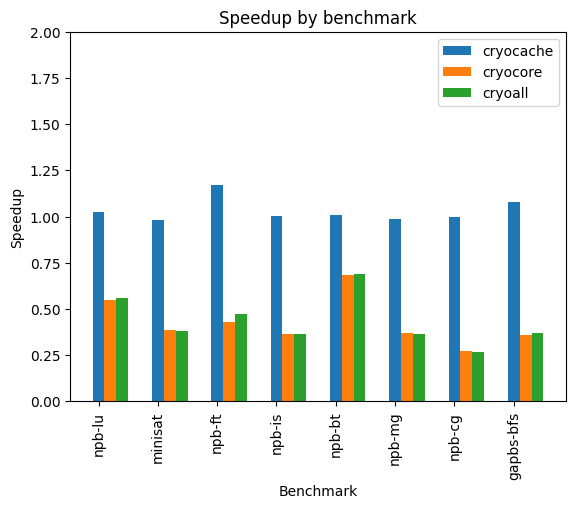

In [5]:
speedup()

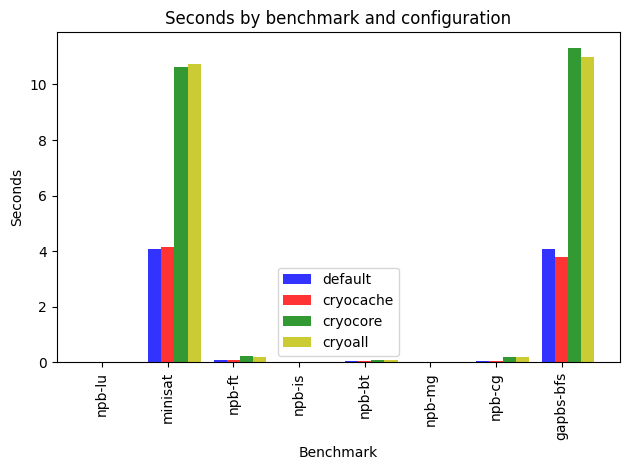

In [6]:
plot('Seconds')

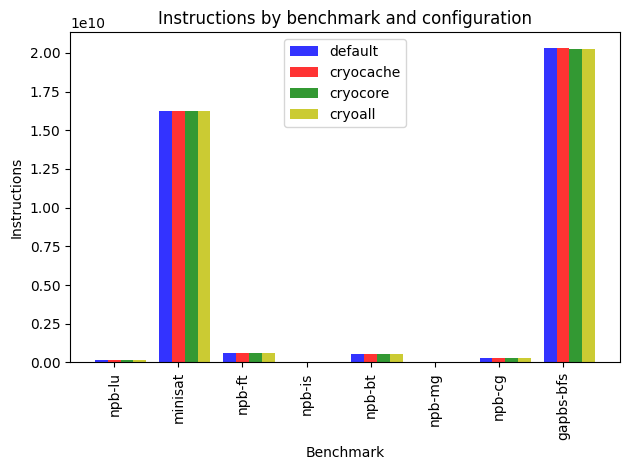

In [7]:
plot('Instructions')

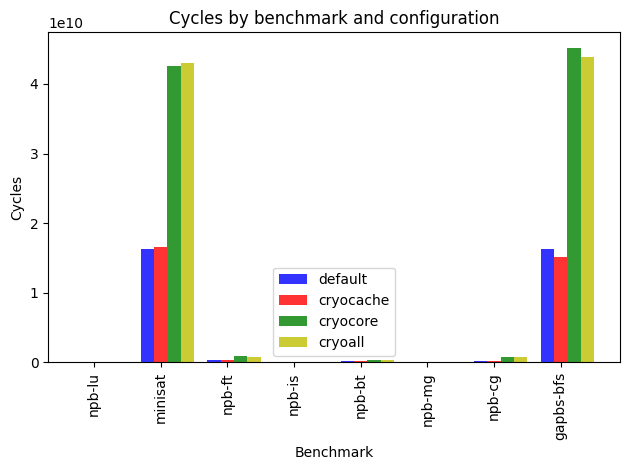

In [8]:
plot('Cycles')

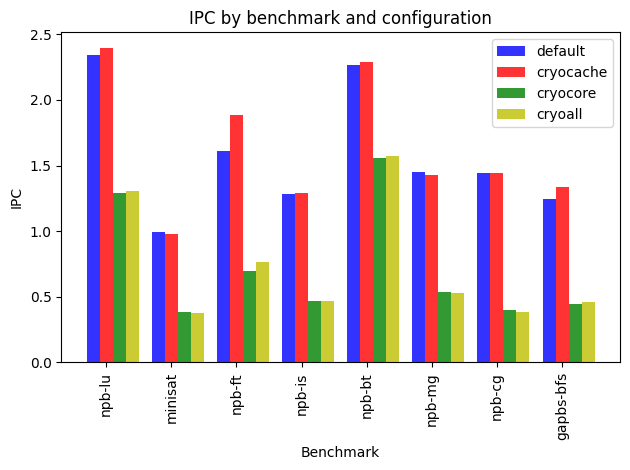

In [9]:
plot('IPC')